# Homework: Sonar signal classification
In this workshop you will train a binary classification neural network to differentiate if sonar signals bounced against a metal cylinder or a rock.

[Info of the data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Goal: Get an accuracy higher than 0.80 in the validation set

## Get the data from Google Drive

In [5]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
# Download data
download = drive.CreateFile({'id': '1rw5l3jCo2vlNc8NLrMk3KPZr6HsjNRCY'})
download.GetContentFile('sonar.csv')

In [8]:
ls

sample_data/  sonar.csv


## Do some magic below! ;)

In [73]:
import pandas as pd
data = pd.read_csv('sonar.csv')

In [74]:
print(data.shape)
data.head()

(207, 61)


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [11]:
# Show variables
data.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [12]:
# Import dependencies for pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [13]:
# Convert pandas Dataframe to Numpy Array
data_numpy = data.values

In [27]:
# Show data type before and after conversion
print(type(data))
print(type(data_numpy))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [77]:
# Separate input variables from output label
X = data_numpy[:, :60]
y = data_numpy[:, 60:61]

In [78]:
# Show shape of training data and labels
print("Shape of training data: ", X.shape)
print("Shape of training labels: ", y.shape)

Shape of training data:  (207, 60)
Shape of training labels:  (207, 1)


In [37]:
import numpy as np
# Show different classes to predict
np.unique(y)

array(['M', 'R'], dtype=object)

In [38]:
# Normalizing the data to improve stability while training
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [39]:
# Show mean and Standard Deviation learnt from training data
print("Mean per variable: \n", sc.mean_)
print("Standard Deviation per variable: \n", sc.scale_)

Mean per variable: 
 [0.02920821 0.038443   0.0438372  0.05405266 0.07510483 0.10459903
 0.1215913  0.13467681 0.17736087 0.20824541 0.23637585 0.2506657
 0.27354444 0.29768937 0.32142947 0.37921691 0.41649517 0.45305459
 0.5047971  0.56344928 0.6092087  0.62484106 0.64800966 0.67322271
 0.67544444 0.70014831 0.70211498 0.69347343 0.64189517 0.58187101
 0.50628116 0.43990338 0.41676135 0.40153527 0.39034348 0.3825971
 0.3623314  0.33835266 0.32498551 0.31138454 0.2904029  0.2782686
 0.24636812 0.21305314 0.19690918 0.16073768 0.12253671 0.09121691
 0.05199469 0.02036618 0.0160343  0.01347198 0.01072947 0.01091691
 0.00930048 0.00818068 0.00777101 0.00794686 0.00793623 0.00652319]
Standard Deviation per variable: 
 [0.02298205 0.0329598  0.03842804 0.04647046 0.05553434 0.05910397
 0.06174727 0.08513394 0.11802454 0.13441558 0.13260138 0.13992518
 0.14091989 0.16367774 0.20466191 0.23241141 0.26357367 0.26131364
 0.25798827 0.2625886  0.25780923 0.25575285 0.24972998 0.23897566
 0.24492

In [40]:
# Show data before and after normalization
print("Before normalization: \n", X[1, :])
print("After normalization: \n", X_norm[1, :])

Before normalization: 
 [0.0262 0.0582 0.1099 0.1083 0.0974 0.228 0.2431 0.3771 0.5598 0.6194
 0.6333 0.706 0.5544 0.532 0.6479 0.6931 0.6759 0.7551 0.8929 0.8619
 0.7974 0.6737 0.4293 0.3648 0.5331 0.2413 0.507 0.8533 0.6036 0.8514
 0.8512 0.5045 0.1862 0.2709 0.4232 0.3043 0.6116 0.6756 0.5375 0.4719
 0.4647 0.2587 0.2129 0.2222 0.2111 0.0176 0.1348 0.0744 0.013 0.0106
 0.0033 0.0232 0.0166 0.0095 0.018 0.0244 0.0316 0.0164 0.0095 0.0078]
After normalization: 
 [-0.13089402  0.59942737  1.71912994  1.16735119  0.40146635  2.0878624
  1.96783928  2.84755057  3.24033559  3.0588314   2.99336374  3.25412687
  1.99301568  1.43153632  1.59516994  1.35054941  0.98418341  1.15587309
  1.50434322  1.13657152  0.7299634   0.19103966 -0.87578456 -1.29060301
 -0.58117267 -1.9344945  -0.79426005  0.67421422 -0.15940651  1.22329719
  1.62389684  0.30345092 -1.11702254 -0.56812432  0.12778034 -0.29870811
  1.04310888  1.58973492  1.06937304  0.8985258   1.02344674 -0.11597725
 -0.2408284   0.069046

In [41]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [42]:
# Show labels before and after one-hot encoding
print("Before onet-hot encodeing: \n", y[0])
print("After onet-hot encodeing: \n", y_onehot[0])

Before onet-hot encodeing: 
 ['R']
After onet-hot encodeing: 
 [0. 1.]


In [79]:
# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot,
                                                  test_size=0.10)

In [80]:
# Show sizes of partitions
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)

Size of training data:  (186, 60)
Size of training labels:  (186, 2)
Size of validation data:  (21, 60)
Size of validation labels:  (21, 2)


#Red Totalmente Conectada

In [48]:
# Import dependencies for designing Keras model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [81]:
# Design simple neural network architecture
model = Sequential()
model.add(Dense(70, input_dim=60, activation='relu'))
model.add(Dropout(0.2))  # Añadir dropout con una tasa de 0.2 (20% de neuronas se desactivan aleatoriamente)
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))  # Añadir dropout con una tasa de 0.2
model.add(Dense(2, activation='softmax'))


In [82]:
# Show model information
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 70)                4270      
                                                                 
 dropout_8 (Dropout)         (None, 70)                0         
                                                                 
 dense_14 (Dense)            (None, 30)                2130      
                                                                 
 dropout_9 (Dropout)         (None, 30)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                 62        
                                                                 
Total params: 6462 (25.24 KB)
Trainable params: 6462 (25.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
# Configuración de Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)


# Choose loss function, optimizer and training metrics
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])



In [84]:
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val), verbose=1,
                    callbacks=[early_stopping_monitor])

Epoch 1/100
3/3 [==============================] - 1s 97ms/step - loss: 0.7157 - accuracy: 0.5215 - val_loss: 0.6851 - val_accuracy: 0.5714
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6919 - accuracy: 0.5914 - val_loss: 0.6496 - val_accuracy: 0.7143
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6520 - accuracy: 0.6774 - val_loss: 0.6205 - val_accuracy: 0.8095
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6410 - accuracy: 0.6828 - val_loss: 0.5957 - val_accuracy: 0.7619
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6103 - accuracy: 0.6989 - val_loss: 0.5742 - val_accuracy: 0.7619
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5981 - accuracy: 0.6989 - val_loss: 0.5530 - val_accuracy: 0.8095
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.5982 - accuracy: 0.6989 - val_loss: 0.5333 - val_accuracy: 0.8571
Epoch 8/100
3/3 [===

In [85]:
# Import dependence for plotting training process
import matplotlib.pyplot as plt

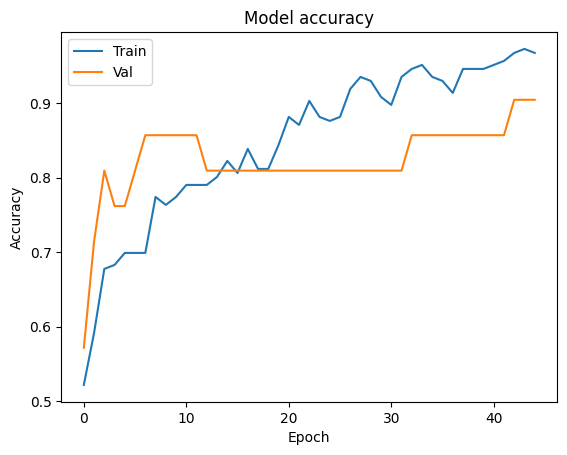

In [86]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

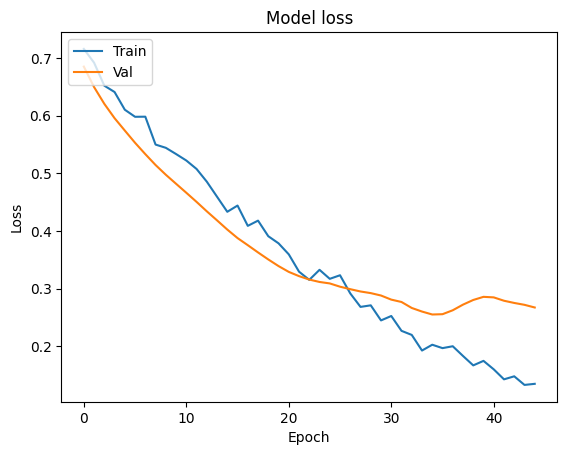

In [87]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()